<a href="https://colab.research.google.com/github/IrfanKhalid/Data-Science/blob/master/LogitcFunction_GradiantDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets 
from math import exp
import sys
import time


Time:  0.046781063079833984  Iterations:  501


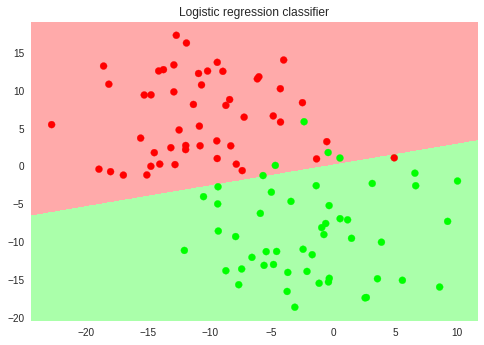

In [0]:
# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the Stochastic gradient descent of the negative log-likelihood
def log_grad_Stochastic(theta, x, y):
    i=np.random.permutation(x.shape[0])[0]
    g = logistic_func(theta,x[i])
    return -x[i].T.dot(y[i]-g)
    
# Function to Compute Gradiant
# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)
    
    
    
# implementation of Stochastic gradient descent for logistic regression
def grad_desc(theta, x1, y, alpha, tol, maxiter):
    start_time = time.time()
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x1, y))
    nll_delta = tol * 2.0
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):                      
        
        theta = theta - (alpha * log_grad(theta, x1, y))         
        nll_vec.append(neg_log_like(theta, x1, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        #print(iter)
        iter += 1
    print("Time: ",time.time()-start_time," Iterations: ", iter)
    return theta, np.array(nll_vec)

# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

## Generate dataset    
np.random.seed(2017) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# Initialize theta to zero
theta = np.zeros(shape[1]+1)

# Run gradient descent
alpha = 0.0001
tol = 1e-3
maxiter = 1000
theta,cost = grad_desc(theta,xtilde,y,alpha,tol,maxiter)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].


## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression classifier")
plt.show()

Time:  0.9300408363342285  Iterations:  272


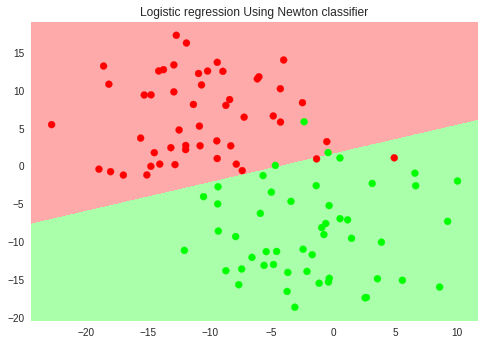

In [0]:
# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the Stochastic gradient descent of the negative log-likelihood
def log_grad_Stochastic(theta, x, y):
    i=np.random.permutation(x.shape[0])[0]
    g = logistic_func(theta,x[i])
    return -x[i].T.dot(y[i]-g)
    
# Function to Compute Gradiant
# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)
    
    
    
def grad_desc_By_Using_Newton(theta, x, y, alpha, tol, maxiter):
    start_time = time.time()
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = tol * 2.0
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):                                 
    # Newton Method Implementaio
      SumValue=0  
      for a in x:
        SumValue+=a.dot(np.transpose(a)) * logistic_func(theta, a) * (1-logistic_func(theta, a))
      theta=theta-((1/SumValue) * log_grad(theta, x, y))
      #print("Sum Value",SumValue)  
      #theta = theta - (alpha * log_grad(theta, x1, y))         
      nll_vec.append(neg_log_like(theta, x, y))
      nll_delta = nll_vec[-2]-nll_vec[-1]
      #print(iter)
      iter += 1
    print("Time: ",time.time()-start_time," Iterations: ", iter)
    return theta, np.array(nll_vec)

# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

## Generate dataset    
np.random.seed(2017) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# Initialize theta to zero
theta = np.zeros(shape[1]+1)

# Run gradient descent
alpha = 0.0001
tol = 1e-3
maxiter = 1000
theta,cost = grad_desc_By_Using_Newton(theta,xtilde,y,alpha,tol,maxiter)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].


## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression Using Newton classifier")
plt.show()

Time:  0.00508880615234375  Iterations:  21


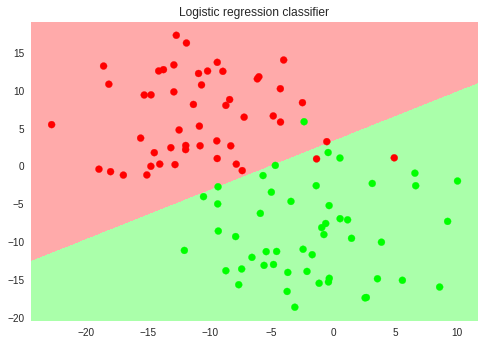

In [0]:
# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the Stochastic gradient descent of the negative log-likelihood
def log_grad_Stochastic(theta, x, y):
    i=np.random.permutation(x.shape[0])[0]
    g = logistic_func(theta,x[i])
    return -x[i].T.dot(y[i]-g)
    
# Function to Compute Gradiant
# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)
    
    
    
# implementation of gradient descent for logistic regression
def grad_desc_By_Stochastic(theta, x1, y, alpha, tol, maxiter):
    start_time = time.time()
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x1, y))
    nll_delta = tol * 2.0
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):                      
        
        theta = theta - (alpha * log_grad_Stochastic(theta, x1, y))         
        nll_vec.append(neg_log_like(theta, x1, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        #print(iter)
        iter += 1
    print("Time: ",time.time()-start_time," Iterations: ", iter)
    return theta, np.array(nll_vec)

# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

## Generate dataset    
np.random.seed(2017) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# Initialize theta to zero
theta = np.zeros(shape[1]+1)

# Run gradient descent
alpha = 0.0001
tol = 1e-3
maxiter = 1000
theta,cost = grad_desc_By_Stochastic(theta,xtilde,y,alpha,tol,maxiter)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].


## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression classifier")
plt.show()